### Homework 05 - In-Class Competition -  Emotion Detection

You've seen the power of transfer learning in building new models; let's try it again. You're going to build a model to predict someone's emotion based on a photo of their face.

<img src="./images/emotions.png" style="width:50%; margin:0 auto;" />


__Dataset summary:__

The dataset we use contains about 12k labeled images. Each image represents only one facial emotion. The dataset contains seven different classes of emotions: namely: Surprise, Fear, Disgust, Happiness, Sadness, Anger, and Neutral.

__Objective:__

Your task is to build an image classification model using PyTorch's pre-trained models that classifies which class of emotion a human is showing.

Here are the steps you need to follow:

__Step 1: Preparing Data__

Follow the steps below to create the PyTorch dataset.

__Step 2: PyTorch DataLoaders__

Using the created datasets, build training and validation DataLoaders.

__Step 3: Building the Model__

Create your model with the help of one of PyTorch's pretrained models. e.g. `resnet50`.

__Step 4: Training and Evaluation__

Train your model using the train dataset and validate it on the validation dataset.

__Step 5: Predictions__

Time to put your trained model to the test. This one is on me!

---

In [7]:
ls

 Volume in drive C is OS
 Volume Serial Number is D6D3-CFD0

 Directory of C:\Users\ricar\Desktop\compe

07/03/2025  08:41    <DIR>          .
07/03/2025  08:28    <DIR>          ..
07/03/2025  08:41    <DIR>          .ipynb_checkpoints
06/03/2025  21:16            17,913 Homework 05 -- Emotion Detection.ipynb
               1 File(s)         17,913 bytes
               3 Dir(s)  843,109,957,632 bytes free


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split

np.random.seed(72)
torch.manual_seed(72)

---

<div class="alert-warning">
Once you know that you have prepared the data as I asked, and that you have a a working model and code, you can switch to Kaggle or Colab to train the model on GPUs.
</div>

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

NameError: name 'torch' is not defined

---

### Data and Preprocessing

Let's see what we have!

`train_all` a directory contains 12,000 face images!

`train_labels.csv` a csv files contains a list of image names and their corresponding labels.

In [2]:
train_df = pd.read_csv('train_labels.csv')
print(train_df.shape)
train_df.head()

(12000, 2)


,img,label
0,img_517.jpg,4
1,img_11953.jpg,7
2,img_8246.jpg,1
3,img_7711.jpg,4
4,img_9351.jpg,2


In [ ]:
train_df.label.value_counts()

In order for us to be able to use TorchVision ImageFolder for datasets (which is the most convenient way to handle image datasets), we need to create a directory for each class of images and then move each image into its corresponding directory. 

Of course we do not want to do this manually!

<div class="alert-info">
If you do not know how, ask ChatGPT! to write some code to do this for you. <br />
Yes! this is the first time I am asking you to use it, and it's not like you haven't used it before! ;)
</div>

<br>

After this step, you should have a directory called __train__, where inside there are 7 directories named based on each class of activity, and the corresponding images are stored inside. Something like this:

<pre>
├── train
  ├── Surprise
  │   ├── img_5.jpg
  │   ├── img_9.jpg
  │   └── ...
  ├── Fear
  │   ├── img_26.jpg
  │   ├── img_613.jpg
  │   └── ...
  └── ...
</pre>

In [ ]:
labels_to_class = { 1: "Surprise", 2: "Fear", 3: "Disgust", 4: "Happiness", 
                    5: "Sadness", 6: "Anger", 7: "Neutral"}

In [ ]:
# your code

In [ ]:
# your code

Let's see if you got it right:

In [5]:
from PIL import Image
from IPython.display import display

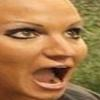

In [4]:
img = Image.open('/kaggle/input/faceemotions/FaceEmotions/train/Surprise/img_246.jpg')
display(img)

#### Transformations

Create two TorchVision transforms, one for the train and one for the validation dataset.

<span style="color:crimson">Note:</span>

    - The train transform should have at least these four operations.
    - The validation transform should have only these four operations and nothing else.

- Resize the image to 256. 
- CenterCrop image to 224. The size needed for __restnet50__ model.
- Convert to tensors.
- Normalize with: [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]
    
name them __train_transform__ and __val_transform__. 

In [8]:
import torchvision
from torchvision import transforms

In [9]:
# Transforms | Augmentation
train_transform = transforms.Compose(
    [
        transforms.RandomResizedCrop(256),
        transforms.RandomRotation(degrees=45),
        transforms.ColorJitter(hue=0.5),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize( mean=[0.485, 0.456, 0.406] , std=[0.229, 0.224, 0.225] )
    ]
)

val_transform = transforms.Compose(
    [
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize( mean=[0.485, 0.456, 0.406] , std=[0.229, 0.224, 0.225] )
    ]
)
train_transform(img)

tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.8044, -1.8044,  ..., -1

### Dataset

Now create a dataset named __train_dataset__ using TorchVIsion ImageFolder for your training data.

In [10]:
from torchvision import datasets
train_dataset = datasets.ImageFolder(root="/kaggle/input/faceemotions/FaceEmotions/train/")

Check:

In [11]:
len(train_dataset)

12000

In [12]:
categories = train_dataset.class_to_idx
categories

{'Anger': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happiness': 3,
 'Neutral': 4,
 'Sadness': 5,
 'Surprise': 6}

<span style="color:crimson"> Important! </span>
After creating the dataset using ImageFolder, the labels are now:

{'Anger': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happiness': 3,
 'Neutral': 4,
 'Sadness': 5,
 'Surprise': 6}
 
Make sure you have the same mapping between class names and class indices.

### Train/Validation Split

Split the __train_dataset__ to create train and validation datasets. Use __11000__ examples for the train and __1000__ examples for the validation. 

In [14]:
train_dataset[0]

(<PIL.Image.Image image mode=RGB size=100x100>, 0)

In [21]:
train_dataset, val_dataset = random_split(train_dataset, [11000, 1000])

len(train_dataset), len(val_dataset)

ValueError: Sum of input lengths does not equal the length of the input dataset!

<span style="color:crimson">Note:</span> If your train and validation transforms are different. you can assign the correct ones to your datasets here after the split. Assign __train_transform__ to __train_dataset__ and __val_transform__ to __val_dataset__.

In [22]:
train_dataset.dataset.transform = train_transform
val_dataset.dataset.transform = val_transform

### DataLoaders

Using the created datasets, build training and validation DataLoaders. Select an appropriate __batch_size__!

In [56]:
scaler = torch.cuda.amp.GradScaler()  # Enables mixed precision

for images, labels in train_loader:
    images, labels = images.to(device), labels.to(device)

    optimizer.zero_grad()
    
    with torch.cuda.amp.autocast():  # Enables float16 precision
        outputs = model(images)
        loss = criterion(outputs, labels)

    scaler.scale(loss).backward()
    scaler.step(optimizer)
    scaler.update()

<ipython-input-56-3a4d40804541>:1: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()  # Enables mixed precision
<ipython-input-56-3a4d40804541>:8: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():  # Enables float16 precision


OutOfMemoryError: CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 15.89 GiB of which 27.12 MiB is free. Process 2796 has 15.86 GiB memory in use. Of the allocated memory 15.51 GiB is allocated by PyTorch, and 56.48 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [57]:
from torch.utils.data import DataLoader

# Reduce batch size to avoid OOM errors
batch_size = 16  # Try 16, if still OOM, use 8

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=True)


In [53]:
len(train_loader), len(val_loader)

(86, 8)

Let's check the input, output dimensions:

In [54]:
img, label = next(iter(val_loader))
img.shape, label.shape

(torch.Size([128, 3, 224, 224]), torch.Size([128]))

### Building a Model

Based on what I told you about how we build models in transfer learning (you can also check the corresponding code file), build a classification model using `resnet50` to classify our images.

Here are the steps you can follow:

- Bring `resnet50` from torchvision models.
- Review the model layers and architecture. (It is a very large model, trained to classify 1000 image labels, so it can be used as a powerful feature extractor).
- The only part of the model I want you to change is the __fc__ part at the end. Replace it with your own __fc__ classifier head. 
- Remember to freeze the beginning part of the model. (We will talk about this step more in class)

In [58]:
import torch
import torch.nn as nn
from torchvision import models

class EmotionClassifier(nn.Module):
    def __init__(self, num_classes=7):
        super(EmotionClassifier, self).__init__()

        # Load ConvNeXt-Tiny (better than ResNet/EfficientNet)
        self.model = models.convnext_tiny(pretrained=True)

        # Unfreeze last few layers for better fine-tuning
        for param in list(self.model.parameters())[-20:]:
            param.requires_grad = True

        # Modify classifier
        in_features = self.model.classifier[2].in_features
        self.model.classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),  # Global Average Pooling to remove (1,1) dims
            nn.Flatten(),  # Flatten from [batch, features, 1, 1] → [batch, features]
            nn.LayerNorm(in_features),  
            nn.Linear(in_features, 512),
            nn.GELU(),
            nn.Dropout(0.5),

            nn.Linear(512, 256),
            nn.GELU(),
            nn.Dropout(0.4),

            nn.Linear(256, num_classes)  
        )

    def forward(self, x):
        return self.model(x)

# Initialize model
num_classes = 7  
model = EmotionClassifier(num_classes)


### Model Training

In [59]:
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Accuracy function
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(torch.argmax(y_pred, dim=1), y_true).sum().item()
    return (correct / len(y_pred)) * 100 

def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=20, device='cuda'):
    model.to(device)

    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
    
    for epoch in range(num_epochs):
        model.train()
        train_loss, train_acc = 0.0, 0.0
        
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()

            # Gradient Clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            scheduler.step()  # Adjust learning rate dynamically

            train_loss += loss.item()
            train_acc += accuracy_fn(labels, outputs)  

        train_loss /= len(train_loader)
        train_acc /= len(train_loader)

        # Validation Phase
        model.eval()
        val_loss, val_acc = 0.0, 0.0
        
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                val_acc += accuracy_fn(labels, outputs)

        val_loss /= len(val_loader)
        val_acc /= len(val_loader)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)

        print(f"Epoch {epoch+1}/{num_epochs} -> "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% | "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")

    return train_losses, val_losses, train_accuracies, val_accuracies

# Training Setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.CrossEntropyLoss()

# Optimizer with Learning Rate Scheduler
optimizer = optim.AdamW(model.parameters(), lr=0.0005, weight_decay=1e-4)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)

# Train Model
num_epochs = 20
train_losses, val_losses, train_accuracies, val_accuracies = train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs, device)


Epoch 1/20 -> Train Loss: 1.2000, Train Acc: 57.30% | Val Loss: 1.4595, Val Acc: 46.53%
Epoch 2/20 -> Train Loss: 0.8786, Train Acc: 71.08% | Val Loss: 0.9804, Val Acc: 68.35%
Epoch 3/20 -> Train Loss: 0.6447, Train Acc: 78.87% | Val Loss: 1.1229, Val Acc: 64.38%
Epoch 4/20 -> Train Loss: 0.4968, Train Acc: 83.97% | Val Loss: 0.7567, Val Acc: 78.47%
Epoch 5/20 -> Train Loss: 0.3932, Train Acc: 88.07% | Val Loss: 0.7173, Val Acc: 75.89%
Epoch 6/20 -> Train Loss: 0.3110, Train Acc: 91.08% | Val Loss: 0.8670, Val Acc: 73.41%
Epoch 7/20 -> Train Loss: 0.2786, Train Acc: 92.66% | Val Loss: 0.8179, Val Acc: 74.50%
Epoch 8/20 -> Train Loss: 0.2350, Train Acc: 94.38% | Val Loss: 0.6754, Val Acc: 77.28%
Epoch 9/20 -> Train Loss: 0.1923, Train Acc: 95.51% | Val Loss: 1.5776, Val Acc: 56.25%
Epoch 10/20 -> Train Loss: 0.1851, Train Acc: 96.17% | Val Loss: 0.8019, Val Acc: 73.41%
Epoch 11/20 -> Train Loss: 0.1751, Train Acc: 96.23% | Val Loss: 1.3939, Val Acc: 65.08%
Epoch 12/20 -> Train Loss: 0.1

KeyboardInterrupt: 

Of course, you know the rest by now! Bring in the accuracy function and the train/validate loop. 

Train the model and plot the loss and accuracy curves.

Learning curves:

---

### Making Predications

When you are finished training your model, simply run the following code. 

<span style="color:crimson">Do not modify this code! </span>

Except for changing the path to the __x_test.pt__ file and renaming __your_team_name.txt__ file.

In [60]:
x_test = torch.load("/kaggle/input/faceemotionstestdata/x_test.pt")
x_test.shape # torch.Size([350, 3, 224, 224])

<ipython-input-60-caa0eaede9bc>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  x_test = torch.load("/kaggle/input/faceemotionstestdata/x_test.pt")


torch.Size([350, 3, 224, 224])

In [61]:
# DO NOT CHANGE
model.eval()
y_preds = []

with torch.no_grad():
    for x in x_test:
        x = x.to(device).unsqueeze(0)
        y_logits = model(x)
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
        y_preds.append(y_pred.item())
        
print( len(y_preds) )
np.savetxt( "teamavm.txt", y_preds )
print( "Done!" )

350
Done!


---